# Minimal code for Figure 2a polysome profiling panel

## Load libraries and define analysis-specific parameters

In [ ]:
suppressPackageStartupMessages({
# standard analysis and plotting functions, includes dplyr, ggplot2 
library(tidyverse)
# loads lab default ggplot2 theme and provides color-blind friendly palette
library(rasilabRtemplates)
})

theme_set(theme_rasilab() + 
 theme(
  axis.line = element_line(color = "grey"), 
 axis.title.y = element_text(margin = margin(r=10)),
 axis.title.x = element_text(margin = margin(t=10))
))

In [2]:
if (!file.exists('../figures')){
    dir.create('../figures')
}

## Read in data

In [22]:
counts <- read_csv("../../../../data/polysome_profiling/polysome_relic/306-1.csv.gz", skip = 32, show_col_types = F)%>%
  janitor::clean_names() %>%
  type_convert() %>% 
  filter(!is.na(absorbance)) %>%
  filter(distance_mm > 6) %>% 
  mutate(absorbance = absorbance - min(absorbance)) %>%
  mutate(absorbance = absorbance / max(absorbance)) %>%
  write_csv("../../../../source_data/figure_2a.csv") %>%
  print()

# tail(counts)


── Column specification ────────────────────────────────────────────────────────
cols(
  fraction_number = col_character()
)



# A tibble: 2,474 × 4
   distance_mm absorbance fraction_number fraction_volume_ml
         <dbl>      <dbl> <chr>                        <dbl>
 1        6.03      0.834 NA                              NA
 2        6.06      0.813 NA                              NA
 3        6.09      0.797 NA                              NA
 4        6.12      0.781 NA                              NA
 5        6.15      0.763 NA                              NA
 6        6.18      0.751 NA                              NA
 7        6.21      0.734 NA                              NA
 8        6.24      0.719 NA                              NA
 9        6.27      0.706 NA                              NA
10        6.3       0.690 NA                              NA
# … with 2,464 more rows


## Plot polysome profiles

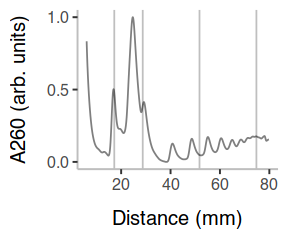

In [21]:
options(repr.plot.width=2.4, repr.plot.height=2)

label_data <- counts %>% 
  filter(!is.na(fraction_number)) %>% 
  filter(fraction_number %in% c(3,5,9,13))

counts %>%
  ggplot(aes(x = distance_mm, y = absorbance)) +
  geom_line(show.legend = F, alpha = 0.5) +
  geom_vline(aes(xintercept = distance_mm), label_data, alpha = 0.25) + 
  # geom_text(aes(label = fraction_number, x = distance_mm), y = 0.02, label_data) + 
  labs(x = "Distance (mm)", y = "A260 (arb. units)") +
  scale_y_continuous(limits = c(0, 1), breaks = c(0.0, 0.5, 1.0)) 

ggsave("../figures/polysome_profiles.pdf", width = 2.4, height = 2)